In [78]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
df=pd.read_csv('castor_datetime.csv.csv')

In [80]:
df.head()

,year,castor_production
0,1966-01-01,57.7
1,1967-01-01,56.1
2,1968-01-01,50.4
3,1969-01-01,59.4
4,1970-01-01,60.5


In [81]:
df.dtypes

year                  object
castor_production    float64
dtype: object

In [82]:
df['year'] = pd.to_datetime(df['year'])

In [83]:
df.dtypes

year                 datetime64[ns]
castor_production           float64
dtype: object

In [84]:
df.set_index('year',inplace=True)

In [85]:
df.head()


,castor_production
year,
1966-01-01,57.7
1967-01-01,56.1
1968-01-01,50.4
1969-01-01,59.4
1970-01-01,60.5


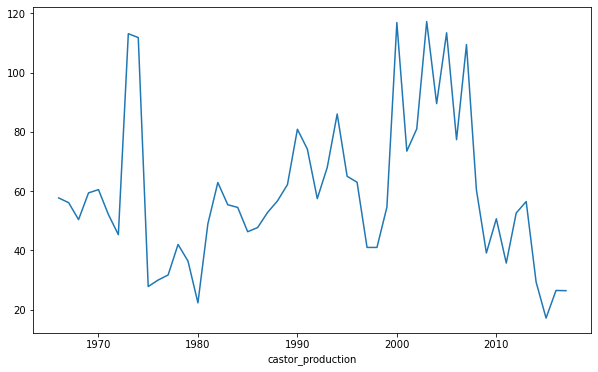

In [86]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('castor_production')
plt.plot(df)

In [87]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

            castor_production
year                         
1966-01-01                NaN
1967-01-01                NaN
1968-01-01                NaN
1969-01-01                NaN
1970-01-01                NaN
1971-01-01                NaN
1972-01-01                NaN
1973-01-01                NaN
1974-01-01                NaN
1975-01-01                NaN
1976-01-01                NaN
1977-01-01          57.991667
1978-01-01          56.683333
1979-01-01          55.041667
1980-01-01          52.700000
1981-01-01          51.833333
1982-01-01          52.033333
1983-01-01          52.308333
1984-01-01          53.075000
1985-01-01          47.508333
1986-01-01          42.166667
1987-01-01          44.250000
1988-01-01          46.475000
1989-01-01          49.016667
1990-01-01          52.255833
1991-01-01          55.405000
1992-01-01          58.335833
1993-01-01          59.919167
1994-01-01          61.844167
1995-01-01          62.644167
1996-01-01          63.352500
1997-01-01

Text(0.5, 1.0, 'rolling mean and std')

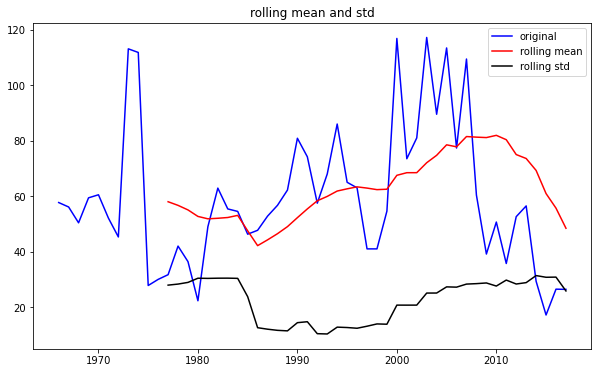

In [88]:
orig = plt.plot(df,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [89]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df['castor_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                   -3.730920
p value                         0.003699
#Lags used                      0.000000
Number of Observations used    51.000000
Criticl Value (1%)             -3.565624
Criticl Value (5%)             -2.920142
Criticl Value (10%)            -2.598015
dtype: float64


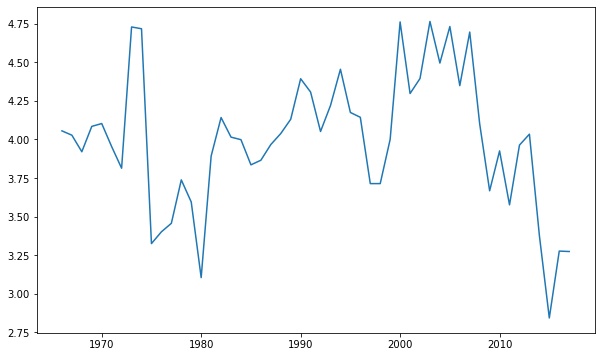

In [90]:
df_logscale = np.log(df)
plt.plot(df_logscale)

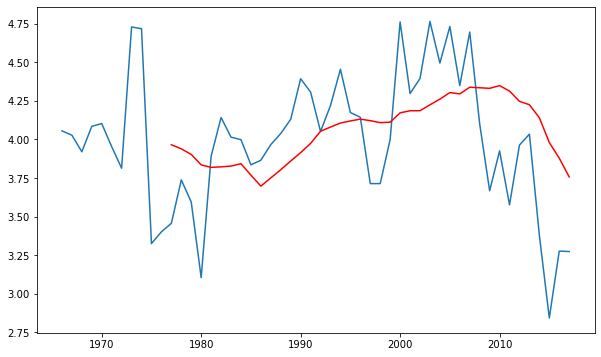

In [91]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [92]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,castor_production
year,
1977-01-01,-0.508961
1978-01-01,-0.201142
1979-01-01,-0.308196
1980-01-01,-0.730227
1981-01-01,0.073046
1982-01-01,0.319530
1983-01-01,0.187445
1984-01-01,0.155659
1985-01-01,0.067027


In [93]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['castor_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -2.797088
p value                        0.058691
#Lags Used                     0.000000
Number of Observatios Used    40.000000
Critical value (1%)           -3.605565
Critical value (5%)           -2.937069
Critical value (10%)          -2.606986
dtype: float64


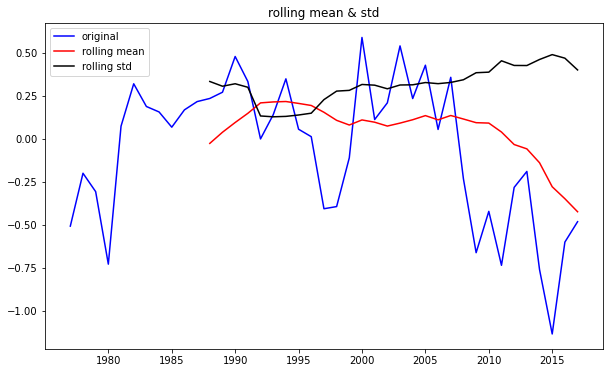

In [94]:
test_stationarity(dflogscale_minusmivingaverage)

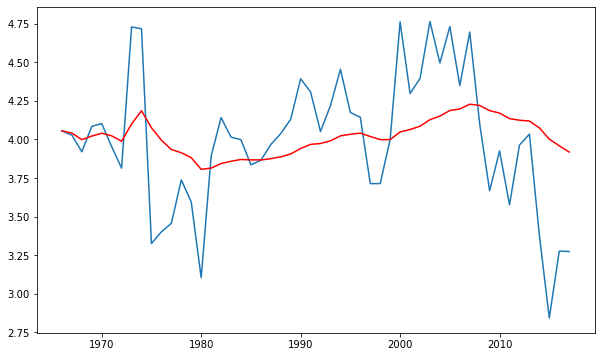

In [95]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -3.333362
p value                        0.013451
#Lags Used                     0.000000
Number of Observatios Used    51.000000
Critical value (1%)           -3.565624
Critical value (5%)           -2.920142
Critical value (10%)          -2.598015
dtype: float64


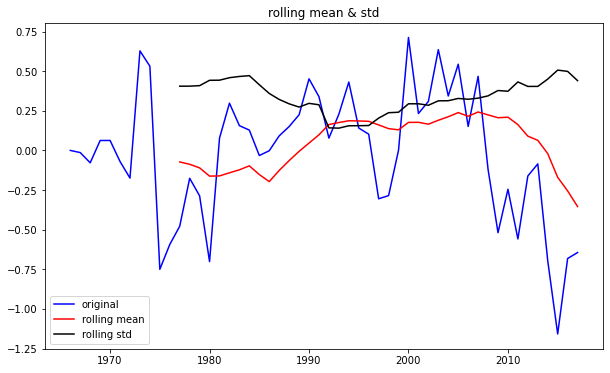

In [96]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

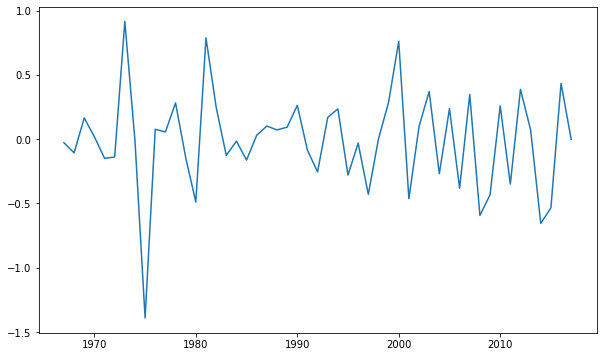

In [97]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic               -7.576031e+00
p value                       2.760204e-11
#Lags Used                    1.000000e+00
Number of Observatios Used    4.900000e+01
Critical value (1%)          -3.571472e+00
Critical value (5%)          -2.922629e+00
Critical value (10%)         -2.599336e+00
dtype: float64


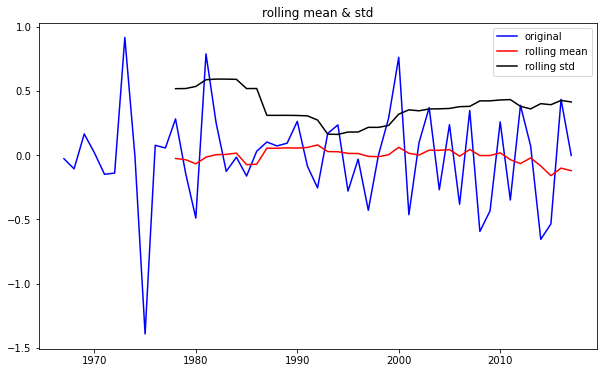

In [98]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

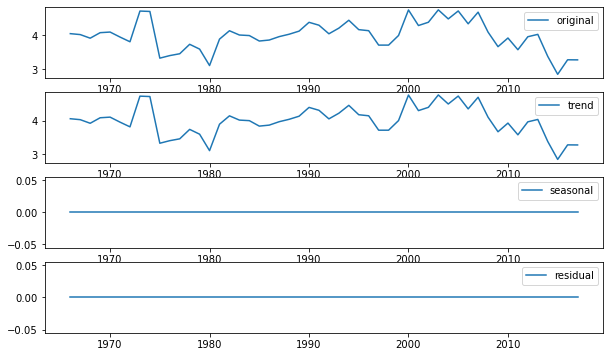

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


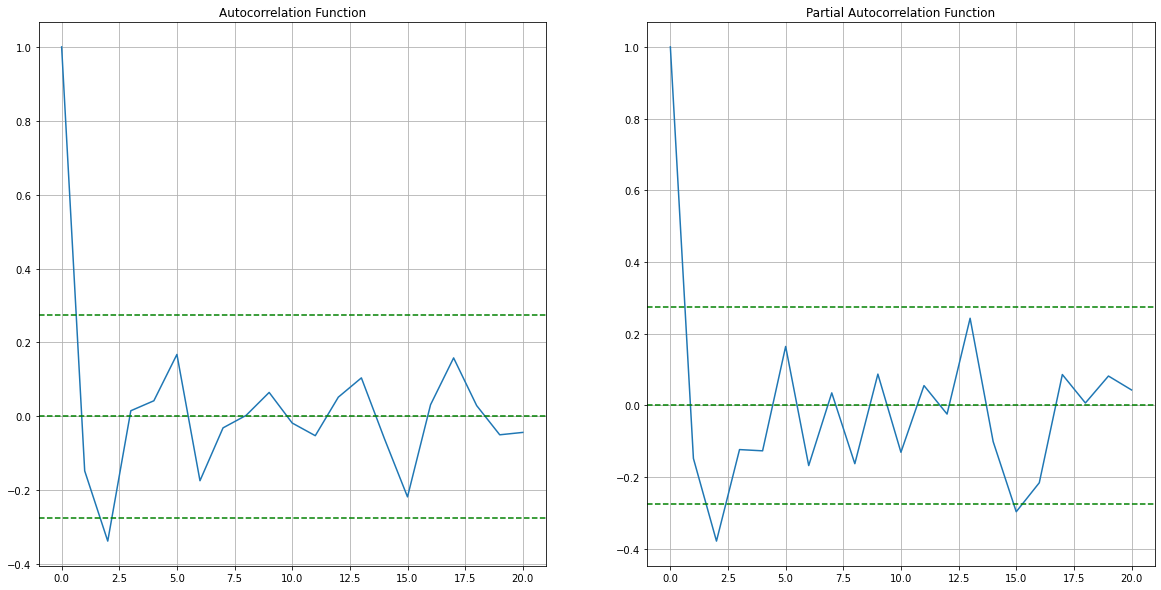

In [100]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN 

plotting AR MODEL


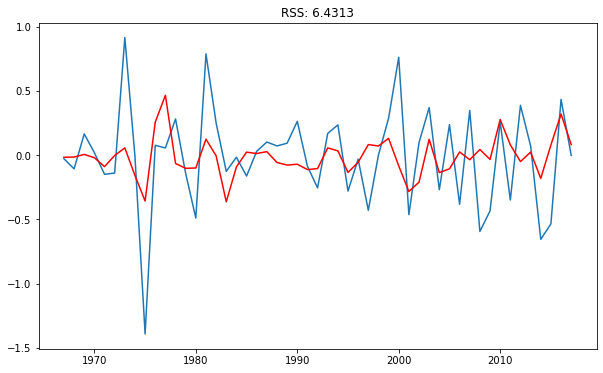

In [101]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dflogdiffshifting['castor_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


plotting AR MODEL


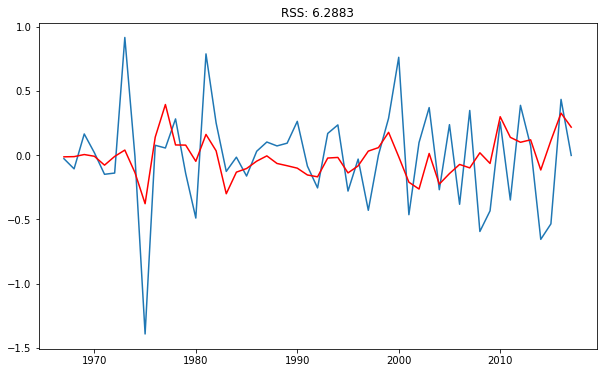

In [102]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dflogdiffshifting['castor_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import

plotting AR MODEL


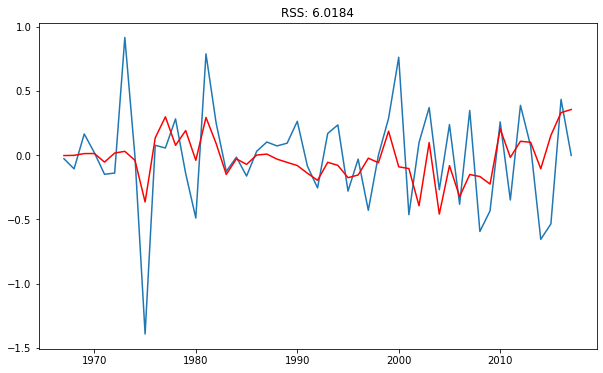

In [103]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dflogdiffshifting['castor_production'])**2))
print('plotting AR MODEL')

In [104]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1967-01-01   -0.003763
1968-01-01   -0.002245
1969-01-01    0.011611
1970-01-01    0.012074
1971-01-01   -0.054571
dtype: float64

In [105]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1967-01-01   -0.003763
1968-01-01   -0.006008
1969-01-01    0.005603
1970-01-01    0.017677
1971-01-01   -0.036895
dtype: float64

In [106]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01    4.055257
1967-01-01    4.023373
1968-01-01    3.913983
1969-01-01    4.089897
1970-01-01    4.120320
dtype: float64

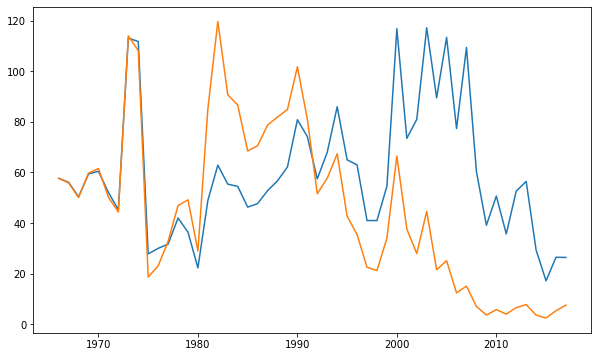

In [107]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(df)
plt.plot(predictions_arima)

In [108]:
df_logscale.head(5)

,castor_production
year,
1966-01-01,4.055257
1967-01-01,4.027136
1968-01-01,3.919991
1969-01-01,4.084294
1970-01-01,4.102643


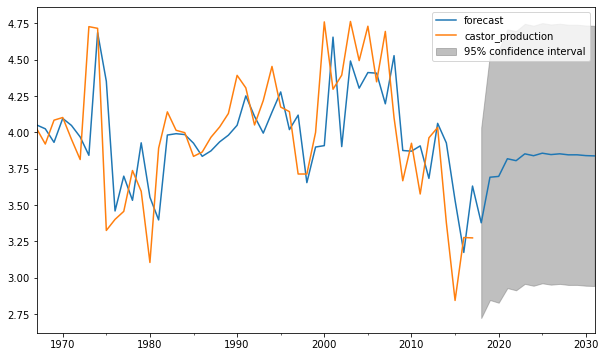

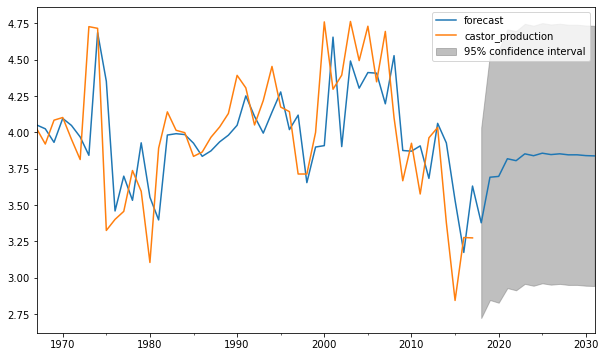

In [126]:
results_ARIMA.plot_predict(1,65)

In [125]:
x = results_ARIMA.forecast(steps=120)

In [115]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [116]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [117]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [122]:
df.size

52